In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

To predict the customer churn, first we are taking customer data set is from a `credit card company`, where we are able review customer attributes such as gender, age, tenure, balance, number of products they are subscribed to, their estimated salary and if they stopped the subscription or not.

In [2]:
df = pd.read_csv("https://raw.githubusercontent.com/anilak1978/customer_churn/master/Churn_Modeling.csv")
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [3]:
# Looking for missing data
missing_data=df.isnull()
for column in missing_data.columns.values.tolist():
    print(column)
    print(missing_data[column].value_counts())
    print("")

RowNumber
False    10000
Name: RowNumber, dtype: int64

CustomerId
False    10000
Name: CustomerId, dtype: int64

Surname
False    10000
Name: Surname, dtype: int64

CreditScore
False    10000
Name: CreditScore, dtype: int64

Geography
False    10000
Name: Geography, dtype: int64

Gender
False    10000
Name: Gender, dtype: int64

Age
False    10000
Name: Age, dtype: int64

Tenure
False    10000
Name: Tenure, dtype: int64

Balance
False    10000
Name: Balance, dtype: int64

NumOfProducts
False    10000
Name: NumOfProducts, dtype: int64

HasCrCard
False    10000
Name: HasCrCard, dtype: int64

IsActiveMember
False    10000
Name: IsActiveMember, dtype: int64

EstimatedSalary
False    10000
Name: EstimatedSalary, dtype: int64

Exited
False    10000
Name: Exited, dtype: int64



In [4]:
# Looking at data types
df.dtypes

RowNumber            int64
CustomerId           int64
Surname             object
CreditScore          int64
Geography           object
Gender              object
Age                  int64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
Exited               int64
dtype: object

In [5]:
# looking at the summary
df.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


Text(34.75919270833333, 0.5, 'Estimated Salary')

<Figure size 1440x1440 with 0 Axes>

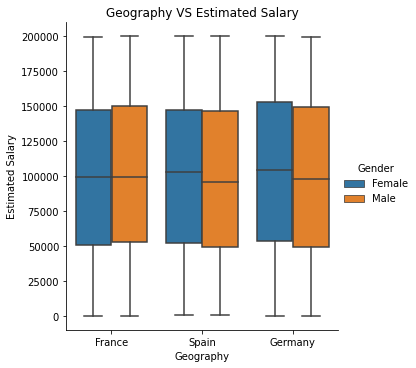

In [6]:
# Looking at Geography and Gender Distribution against Estimated Salary
plt.figure(figsize=(20,20))
sns.catplot(x="Geography", y="EstimatedSalary", hue="Gender", kind="box", data=df)
plt.title("Geography VS Estimated Salary")
plt.xlabel("Geography")
plt.ylabel("Estimated Salary")

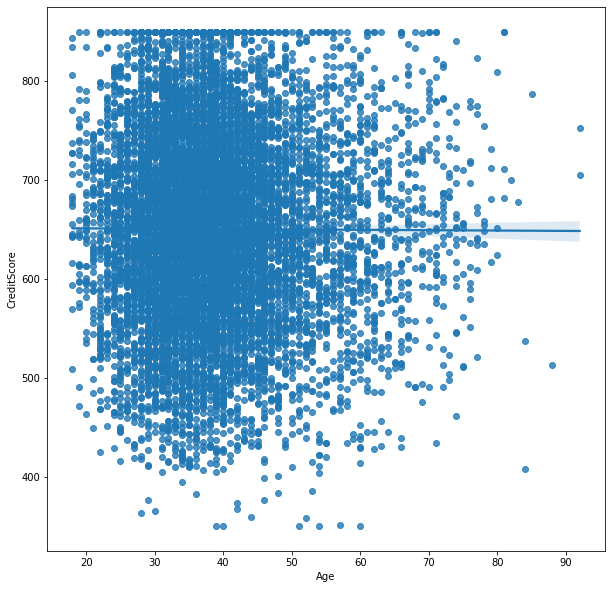

In [7]:
# Looking at linear relationship between Age and CreditScore
plt.figure(figsize=(10,10))
sns.regplot(x="Age", y="CreditScore", data=df)

In [21]:
# Selecting and Preparing the Feature Set and Target
X = df[["CreditScore", "Geography", "Gender", "Age", "Tenure", "EstimatedSalary"]].values
y=df[["Exited"]]
X[0:5], y[0:5]

(array([[619, 'France', 'Female', 42, 2, 101348.88],
        [608, 'Spain', 'Female', 41, 1, 112542.58],
        [502, 'France', 'Female', 42, 8, 113931.57],
        [699, 'France', 'Female', 39, 1, 93826.63],
        [850, 'Spain', 'Female', 43, 2, 79084.1]], dtype=object),    Exited
 0       1
 1       0
 2       1
 3       0
 4       0)

In [24]:
# preprocessing categorical variables
from sklearn import preprocessing
geography=preprocessing.LabelEncoder()
geography.fit(["France", "Spain", "Germany"])
X[:,1]=geography.transform(X[:,1])

gender = preprocessing.LabelEncoder()
gender.fit(["Female", "Male"])
X[:,2]=gender.transform(X[:,2])

In [26]:
# split train and test data
from sklearn.model_selection import train_test_split
X_trainset, X_testset, y_trainset, y_testset = train_test_split(X, y, test_size=0.2, random_state=3)


In [27]:
# create model using DecisionTree Classifier and fit training data
from sklearn.tree import DecisionTreeClassifier
dt_model = DecisionTreeClassifier()
dt_model.fit(X_trainset, y_trainset)

DecisionTreeClassifier()

In [28]:
# create prediction
dt_pred = dt_model.predict(X_testset)
dt_pred[0:5]

array([0, 0, 1, 0, 0])

In [29]:
# Evaluating the prediction model
from sklearn import metrics
metrics.accuracy_score(y_testset, dt_pred)

0.7265

In [30]:
# create Random Forest Decision Tree model
from sklearn.ensemble import RandomForestClassifier
rf_model = RandomForestClassifier(n_estimators=100)
rf_model.fit(X_trainset, y_trainset.values.ravel())

RandomForestClassifier()

In [31]:
# create prediction using rf_model
rf_pred = rf_model.predict(X_testset)
rf_pred[0:5]

array([0, 0, 1, 0, 0])

In [32]:
# evaluate the model
metrics.accuracy_score(y_testset, rf_pred)

0.812

Second, we are looking at a `telecommunication company` and it’s existing customer attributes such as their current plan, charges, location in terms of state, amount of customer service calls, account length and churn.

In [33]:
df = pd.read_csv("https://raw.githubusercontent.com/anilak1978/customer-churn/master/bigml_59c28831336c6604c800002a.csv")
df.head()

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,...,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


In [34]:
# for loop to see unique values
for column in df.columns.values.tolist():
    print(column)
    print(df[column].unique())
    print("")

state
['KS' 'OH' 'NJ' 'OK' 'AL' 'MA' 'MO' 'LA' 'WV' 'IN' 'RI' 'IA' 'MT' 'NY'
 'ID' 'VT' 'VA' 'TX' 'FL' 'CO' 'AZ' 'SC' 'NE' 'WY' 'HI' 'IL' 'NH' 'GA'
 'AK' 'MD' 'AR' 'WI' 'OR' 'MI' 'DE' 'UT' 'CA' 'MN' 'SD' 'NC' 'WA' 'NM'
 'NV' 'DC' 'KY' 'ME' 'MS' 'TN' 'PA' 'CT' 'ND']

account length
[128 107 137  84  75 118 121 147 117 141  65  74 168  95  62 161  85  93
  76  73  77 130 111 132 174  57  54  20  49 142 172  12  72  36  78 136
 149  98 135  34 160  64  59 119  97  52  60  10  96  87  81  68 125 116
  38  40  43 113 126 150 138 162  90  50  82 144  46  70  55 106  94 155
  80 104  99 120 108 122 157 103  63 112  41 193  61  92 131 163  91 127
 110 140  83 145  56 151 139   6 115 146 185 148  32  25 179  67  19 170
 164  51 208  53 105  66  86  35  88 123  45 100 215  22  33 114  24 101
 143  48  71 167  89 199 166 158 196 209  16  39 173 129  44  79  31 124
  37 159 194 154  21 133 224  58  11 109 102 165  18  30 176  47 190 152
  26  69 186 171  28 153 169  13  27   3  42 189 156 134 243 

In [35]:
# feature selection
X = df[["account length", "international plan", "total day charge", "total night charge", "total intl charge", "customer service calls", "state"]]
# target selection
y =df["churn"]
# review feature set
X[0:5]

,account length,international plan,total day charge,total night charge,total intl charge,customer service calls,state
0,128,no,45.07,11.01,2.70,1,KS
1,107,no,27.47,11.45,3.70,1,OH
2,137,no,41.38,7.32,3.29,0,NJ
3,84,yes,50.90,8.86,1.78,2,OH
4,75,yes,28.34,8.41,2.73,3,OK


In [36]:
# update state with one hot coding
X=pd.get_dummies(X, columns=["state"])
# make sure i am using feature set values 
X=X.values
# preprocess to update str variables to numerical variables
from sklearn import preprocessing
international_plan=preprocessing.LabelEncoder()
international_plan.fit(["no", "yes"])
X[:,1] = international_plan.transform(X[:,1])

In [37]:
# create training and testing set
from sklearn.model_selection import train_test_split
X_trainset, X_testset, y_trainset, y_testset = train_test_split(X, y, test_size=0.2, random_state=3)


In [38]:
#create model using random forest classifier and fit the training set
from sklearn.ensemble import RandomForestClassifier
rf_model = RandomForestClassifier(n_estimators=100)
rf_model.fit(X_trainset, y_trainset)

RandomForestClassifier()

In [39]:
#create prediction using the model
rf_pred = rf_model.predict(X_testset)
rf_pred[0:5]

array([False,  True, False, False, False])

In [40]:
# Looking at the accuracy score (using two methods)
from sklearn import metrics
rf_model.score(X_testset, y_testset)
metrics.accuracy_score(y_testset, rf_pred)

0.8935532233883059

In [41]:
# confusion matrics to find precision and recall
from sklearn.metrics import confusion_matrix
confusion_matrix(y_testset, rf_pred)

array([[556,  17],
       [ 54,  40]])

In [44]:
# Looking at the precision score
from sklearn.metrics import precision_score
precision_score(y_testset, rf_pred)

0.7017543859649122

In [45]:
# Looking at the recall score
from sklearn.metrics import recall_score
recall_score(y_testset, rf_pred)

0.425531914893617

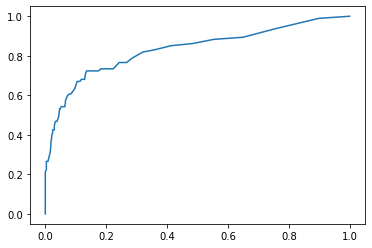

In [47]:
# find probability for each prediction
prob=rf_model.predict_proba(X_testset)[:,1]

# look at ROC curve, which gives us the false and true positive predictions
from sklearn.metrics import roc_curve
fpr, tpr, thresholds=roc_curve(y_testset, prob)
plt.plot(fpr, tpr)

In [48]:
# Looking at the area under the curve
from sklearn.metrics import roc_auc_score
auc=roc_auc_score(y_testset, prob)
auc

0.8322193754409417

In [49]:
#looking at the f1_score
from sklearn.metrics import f1_score
f1_score(y_testset, rf_pred)

0.5298013245033113